In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TASK 1

In [73]:
# Load the dataset
try:
    df = pd.read_csv('Ball_by_Ball.csv') 
    print("Dataset loaded successfully")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

Dataset loaded successfully


In [74]:
# Display the first two rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   
1           2                         2               1         14   
2           2                         2               1         14   
3           2                         2               1         14   
4           2                         2               1         14   

  Batsman_Scored Extra_Type Extra_Runs Player_dissimal_Id Dissimal_Type  \

In [75]:
# Exploring the dataset structure
print ("\nDataset info:")
print (df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136590 entries, 0 to 136589
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Match_Id                  136590 non-null  int64 
 1   Innings_Id                136590 non-null  int64 
 2   Over_Id                   136590 non-null  int64 
 3   Ball_Id                   136590 non-null  int64 
 4   Team_Batting_Id           136590 non-null  int64 
 5   Team_Bowling_Id           136590 non-null  int64 
 6   Striker_Id                136590 non-null  int64 
 7   Striker_Batting_Position  136590 non-null  int64 
 8   Non_Striker_Id            136590 non-null  int64 
 9   Bowler_Id                 136590 non-null  int64 
 10  Batsman_Scored            136590 non-null  object
 11  Extra_Type                136590 non-null  object
 12  Extra_Runs                136590 non-null  object
 13  Player_dissimal_Id        136590 non-null  o

In [76]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Match_Id                    0
Innings_Id                  0
Over_Id                     0
Ball_Id                     0
Team_Batting_Id             0
Team_Bowling_Id             0
Striker_Id                  0
Striker_Batting_Position    0
Non_Striker_Id              0
Bowler_Id                   0
Batsman_Scored              0
Extra_Type                  0
Extra_Runs                  0
Player_dissimal_Id          0
Dissimal_Type               0
Fielder_Id                  0
dtype: int64


In [ ]:
# TASK 2

In [77]:
# Cleaning the dataset - fill empty strings with NaN and then drop rows where key columns are missing
df.replace(' ', pd.NA, inplace=True)
df.dropna(subset=['Match_Id', 'Innings_Id', 'Over_Id', 'Ball_Id'], inplace=True)
print("\nAfter cleaning, missing values:")
print(df.isnull().sum())


After cleaning, missing values:
Match_Id                         0
Innings_Id                       0
Over_Id                          0
Ball_Id                          0
Team_Batting_Id                  0
Team_Bowling_Id                  0
Striker_Id                       0
Striker_Batting_Position         0
Non_Striker_Id                   0
Bowler_Id                        0
Batsman_Scored                  16
Extra_Type                  130330
Extra_Runs                  130330
Player_dissimal_Id          131058
Dissimal_Type               131058
Fielder_Id                  132577
dtype: int64


In [78]:
# Basic statistics for numerical columns
print("\nBasic statistics for numerical columns")
print(df.describe())


Basic statistics for numerical columns
            Match_Id     Innings_Id        Over_Id        Ball_Id  \
count  136590.000000  136590.000000  136590.000000  136590.000000   
mean   590906.063643       1.482744      10.144593       3.617278   
std    195509.555405       0.501576       5.673822       1.808142   
min    335987.000000       1.000000       1.000000       1.000000   
25%    419140.000000       1.000000       5.000000       2.000000   
50%    548353.000000       1.000000      10.000000       4.000000   
75%    734002.000000       2.000000      15.000000       5.000000   
max    981024.000000       4.000000      20.000000       9.000000   

       Team_Batting_Id  Team_Bowling_Id     Striker_Id  \
count    136590.000000    136590.000000  136590.000000   
mean          5.168951         5.156783     126.643239   
std           3.033943         3.038008     111.078188   
min           1.000000         1.000000       1.000000   
25%           3.000000         3.000000      35.

In [79]:
# grouping by dismissal type and counting occurrences
print("\nDismissal types count:")
print(df['Dissimal_Type'].value_counts())


Dismissal types count:
Dissimal_Type
caught                   3245
bowled                   1028
run out                   583
lbw                       326
stumped                   187
caught and bowled         148
retired hurt                8
hit wicket                  6
obstructing the field       1
Name: count, dtype: int64


In [80]:
# Grouping by bowler and calculating number of balls bowled
bowler_stats = df.groupby('Bowler_Id')['Batsman_Scored'].count().sort_values(ascending=False)
print("\nTop 5 bowlers by number of balls bowled:")
print(bowler_stats.head())


Top 5 bowlers by number of balls bowled:
Bowler_Id
50     2738
14     2529
67     2472
136    2466
194    2406
Name: Batsman_Scored, dtype: int64


In [81]:
# Grouping by match and counting the number of balls bowled
match_balls = df.groupby('Match_Id')['Ball_Id'].count().sort_values(ascending=True)
print("\nTotal number of ball bowled in each match:")
print(match_balls)



Total number of ball bowled in each match:
Match_Id
501270     63
598073    100
829812    106
392188    108
336027    123
         ... 
419126    259
829742    261
598009    261
729320    262
392195    267
Name: Ball_Id, Length: 577, dtype: int64


In [82]:
print(df['Extra_Type'].value_counts(dropna=False))

Extra_Type
<NA>       130330
wides        3496
legbyes      1950
noballs       493
byes          320
penalty         1
Name: count, dtype: int64


In [83]:
# Interesting finding: Calculating the percentage of extra balls
total_balls = len(df)
extra_balls = len(df[df['Extra_Type'].notna()])
print(f"\nPercentage of balls that were extras: {(extra_balls/total_balls)*100:.2f}%")


Percentage of balls that were extras: 4.58%


In [84]:
sample_match = df[df['Match_Id'] == 335987]
print(sample_match)

     Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0      335987           1        1        1                1                2   
1      335987           1        1        2                1                2   
2      335987           1        1        3                1                2   
3      335987           1        1        4                1                2   
4      335987           1        1        5                1                2   
..        ...         ...      ...      ...              ...              ...   
220    335987           2       15        5                2                1   
221    335987           2       15        6                2                1   
222    335987           2       15        7                2                1   
223    335987           2       16        1                2                1   
224    335987           2       16        2                2                1   

     Striker_Id  Striker_Ba

In [ ]:
# TASK 3

In [85]:
# Set style for plots
sns.set_style('whitegrid')
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

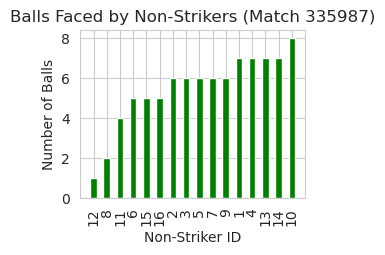

In [95]:
# 1. Bar Chart: Show how many balls each non-striker faced in Match 335987
plt.subplot(2, 2, 1)
sample_match = df[df['Match_Id'] == 335987]
balls_faced = sample_match.groupby('Non_Striker_Id')['Ball_Id'].nunique().sort_values(ascending=True)


plt.bar(balls_faced.index.astype(str), balls_faced.values, width=0.5, color='green')
plt.title('Balls Faced by Non-Strikers (Match 335987)')
plt.xlabel('Non-Striker ID')
plt.ylabel('Number of Balls')
plt.xticks(rotation=90) 
plt.grid(True)


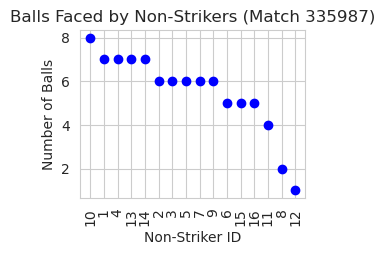

In [99]:
# 2. Scatter plot: Show how many balls each non-striker faced in Match 335987
plt.subplot(2, 2, 4)
sample_match = df[df['Match_Id'] == 335987]
balls_faced = sample_match.groupby('Non_Striker_Id')['Ball_Id'].nunique().sort_values(ascending=False)

plt.scatter(balls_faced.index.astype(str), balls_faced.values, color='blue')
plt.title('Balls Faced by Non-Strikers (Match 335987)')
plt.xlabel('Non-Striker ID')
plt.ylabel('Number of Balls')
plt.xticks(rotation=90)
plt.grid(True)


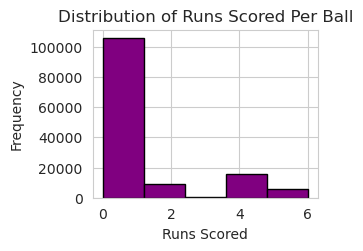

In [111]:
# 3. Histogram: Distribution of runs scored per ball
plt.subplot(2, 2, 4)

# Ensure 'Batsman_Scored' is numeric and drop NaN values
df['Batsman_Scored'] = pd.to_numeric(df['Batsman_Scored'], errors='coerce')
df_clean = df['Batsman_Scored'].dropna()  # Remove NaN values

# Plot histogram with correct bin sizes and edge color
df_clean.plot(kind='hist', bins=5, color='purple', edgecolor='black')

plt.title('Distribution of Runs Scored Per Ball')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(True)


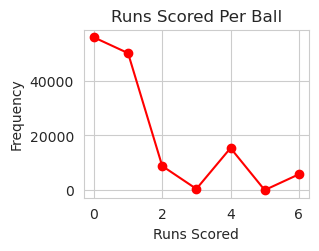

In [112]:
# 4. Line plot: Distribution of runs scored per ball
plt.subplot(2, 2, 4)

# Ensure 'Batsman_Scored' is numeric and drop NaN values
df['Batsman_Scored'] = pd.to_numeric(df['Batsman_Scored'], errors='coerce')
df_clean = df['Batsman_Scored'].dropna()

# Calculate frequency of each run value
run_counts = df_clean.value_counts().sort_index()
plt.plot(run_counts.index, run_counts.values, marker='o', color='red')

plt.title('Runs Scored Per Ball')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(True)
